In [1]:
%matplotlib inline
import pandas as pd
import os
import numpy as np
import seaborn as sn
import matplotlib.pylab as plt  
from matplotlib.font_manager import FontProperties
from celluloid import Camera # getting the camera
from IPython.display import HTML # to show the animation in Jupyter
import warnings
warnings.simplefilter(action='ignore')
fontP = FontProperties()
fontP.set_size('xx-small')

In [2]:
path = os.getcwd()
figure =  os.path.join(path,'src')

In [3]:
!ls

0.png                           batch_history.csv
Baseline_model_V3.ipynb         cleaned_data.csv
Baseline_model_V5.ipynb         coviddata.csv
FastAI_XCRipynb.ipynb           densenet121_train_history.csv
Feature Map Visualization.ipynb fastresult.tsv
Model History.ipynb             resnet50_train_history.csv
PrettyPlotter.ipynb             src
Result_Metrics.ipynb            toy model.ipynb
Understanding Convolution.ipynb vgg19_train_history.csv


In [4]:
df =  pd.read_csv(os.path.join(path,'resnet50_train_history.csv'))

In [5]:
loss =  df['loss']
val_loss  =  df['val_loss']
accuracy =  df['accuracy']
val_accuracy  =  df['val_accuracy']
x =  np.arange(0,100,1)

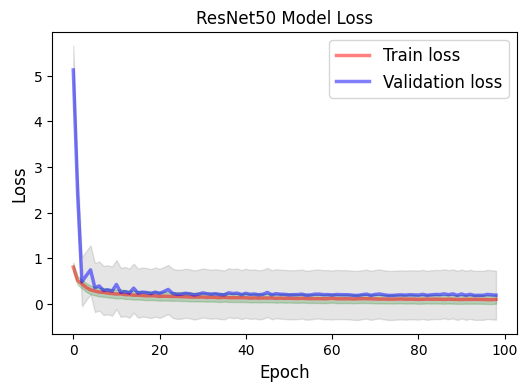

In [6]:
fig, ax = plt.subplots(dpi=100) # let's make it bigger
camera = Camera(fig)# the camera gets our figure
l1 =  loss -  np.std(loss)
l2 =  loss + np.std(loss)
lv1 =  val_loss -  np.std(val_loss)
lv2 =  val_loss + np.std(val_loss)
for i in range(len(x)):
    x_t = x[:i] # current dataset
    y_t = loss[:i] # current sine
    xv_t = x[:i] # current dataset
    yv_t = val_loss[:i] # current sine
    ax.plot(x_t, y_t, 'r',color='red', alpha=0.5,linewidth=2.5,)
    ax.fill_between(x[:i], l1[:i], l2[:i],color="green",alpha=0.2)
    
    ax.plot(x_t,yv_t, color='blue', alpha=0.5,linewidth=2.5,)
    ax.fill_between(x[:i], lv1[:i], lv2[:i],color="black",alpha=0.1)
    ax.set_xlabel("Epoch",fontsize=12)
    ax.set_ylabel("Loss",fontsize=12)
    camera.snap()
plt.legend(['Train loss','Validation loss'],fontsize=12)
plt.title("ResNet50 Model Loss",fontsize=12)
animation = camera.animate(blit=False, interval=180)
HTML(animation.to_html5_video())

In [6]:
animation.save(f'{figure}/resnet50_train_val_loss.mp4',
               dpi=300,
               savefig_kwargs={
                   'frameon': False,
                   'pad_inches': 'tight'
               }
              )

In [7]:
# !ffmpeg -i '/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/Essay/src/resnet50_train_val_loss.mp4' -filter:v fps=fps=30 '/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/Essay/src/resnet50_train_val_loss.gif'

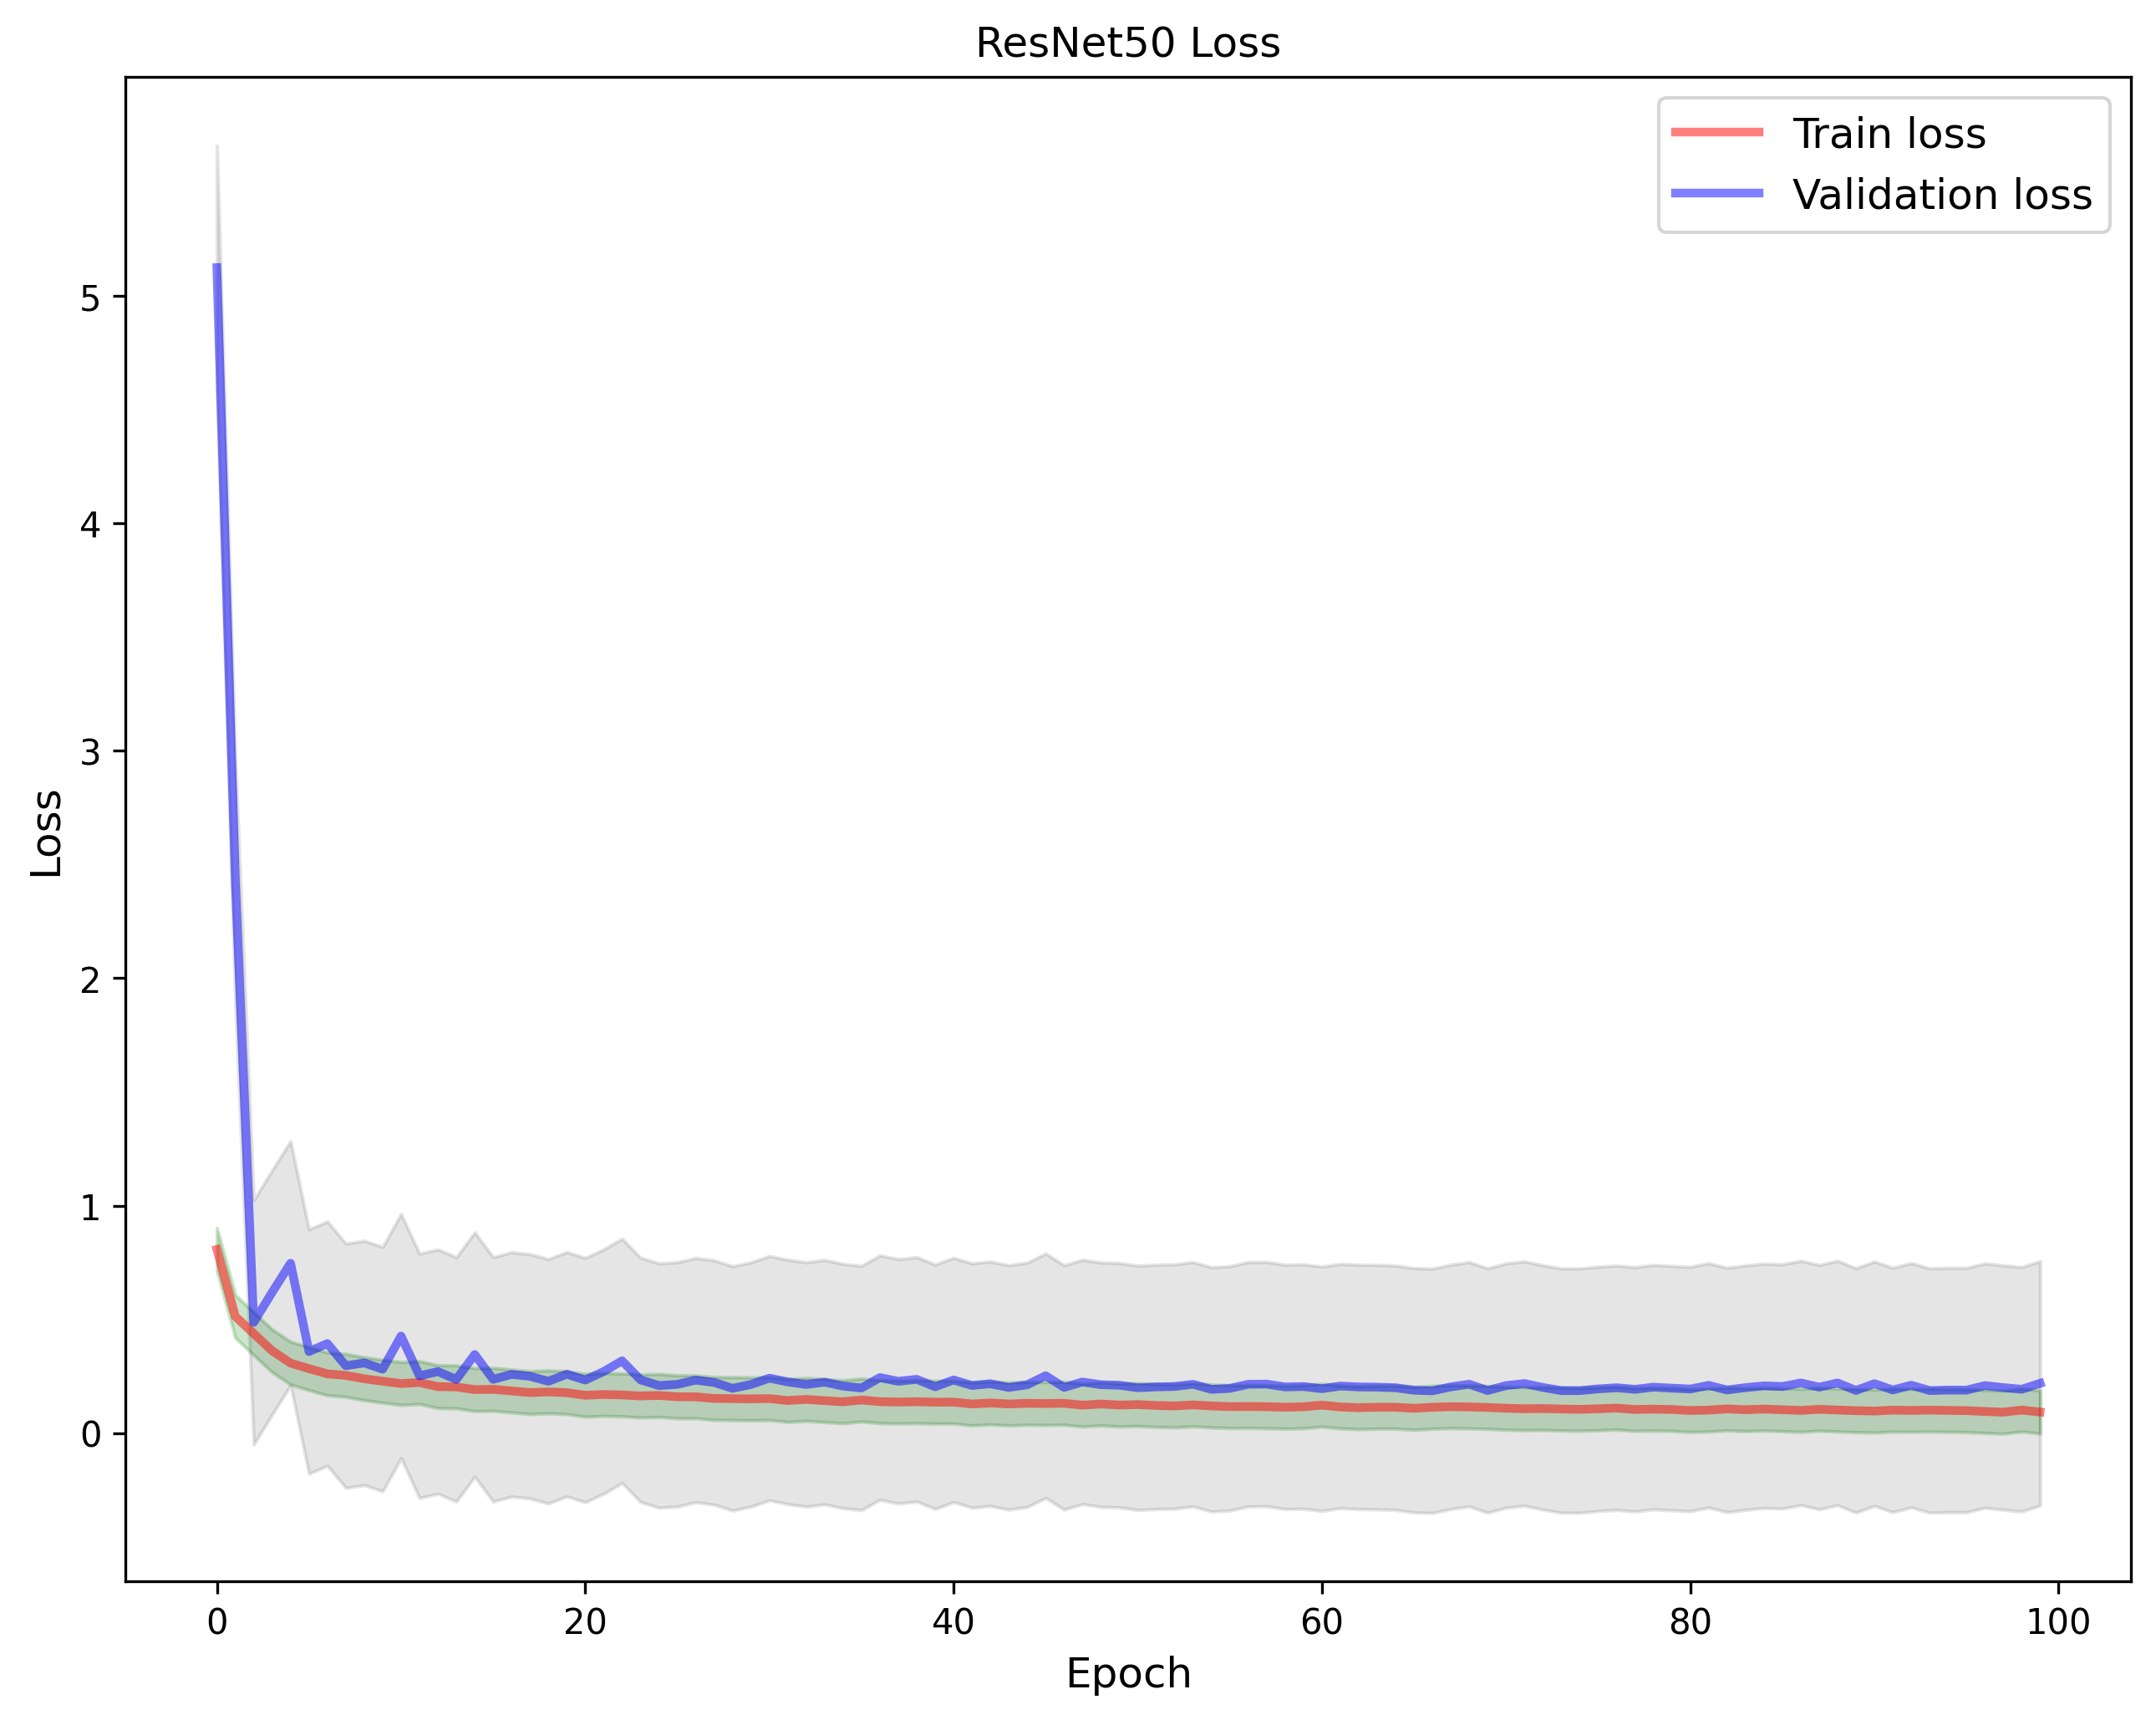

In [371]:
fig= plt.figure(figsize=(8,6),dpi=300)
axes= fig.add_axes([0,0,1,1])
l1 =  loss -  np.std(loss)
l2 =  loss + np.std(loss)
axes.plot(x,loss, color='red', alpha=0.5,linewidth=2.5,)
axes.fill_between(x, l1, l2,color="green",alpha=0.2)
l1 =  val_loss -  np.std(val_loss)
l2 =  val_loss + np.std(val_loss)
axes.plot(x,val_loss, color='blue', alpha=0.5,linewidth=2.5,)
axes.fill_between(x, l1, l2,color="black",alpha=0.1)
axes.set_xlabel("Epoch",fontsize=12)
axes.set_ylabel("Loss",fontsize=12)
plt.legend(['Train loss','Validation loss'],fontsize=12)
plt.title("ResNet50 Loss",fontsize=12)
# plt.tight_layout()
plt.savefig(f'{figure}/resnet50_train_val_loss.pdf',bbox_inches='tight', dpi=300)
plt.show()

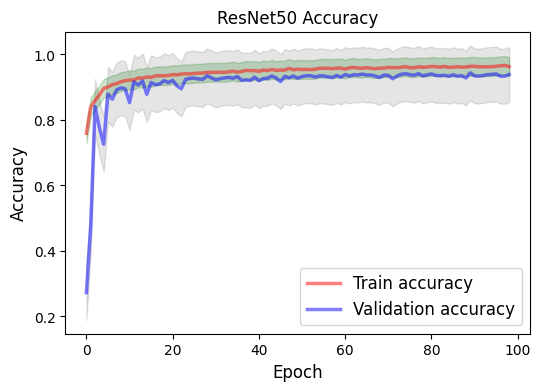

In [346]:
fig, ax = plt.subplots(dpi=100) # let's make it bigger
camera = Camera(fig)# the camera gets our figure
a1 =  accuracy -  np.std(accuracy)
a2 =  accuracy + np.std(accuracy)
av1 =  val_accuracy -  np.std(val_accuracy)
av2 =  val_accuracy + np.std(val_accuracy)
for i in range(len(x)):
    x_t = x[:i] # current dataset
    y_t = accuracy[:i] # current sine
    xv_t = x[:i] # current dataset
    yv_t = val_accuracy[:i] # current sine
    ax.plot(x_t, y_t, 'r',color='red', alpha=0.5,linewidth=2.5,)
    ax.fill_between(x[:i], a1[:i], a2[:i],color="green",alpha=0.2)
    
    ax.plot(x_t,yv_t, color='blue', alpha=0.5,linewidth=2.5,)
    ax.fill_between(x[:i], av1[:i], av2[:i],color="black",alpha=0.1)
    ax.set_xlabel("Epoch",fontsize=12)
    ax.set_ylabel("Accuracy",fontsize=12)
    camera.snap()
plt.legend(['Train accuracy','Validation accuracy'],fontsize=12)
plt.title("ResNet50 Accuracy",fontsize=12)
animation = camera.animate(blit=False, interval=180)
HTML(animation.to_html5_video())

In [10]:
animation.save(f'{figure}/resnet50_train_val_accuracy.mp4',
               dpi=300,
               savefig_kwargs={
                   'frameon': False,
                   'pad_inches': 'tight'
               }
              )

In [11]:
# !ffmpeg -i '/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/Essay/src/resnet50_train_val_accuracy.mp4' -filter:v fps=fps=30 '/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/Essay/src/resnet50_train_val_accuracy.gif'

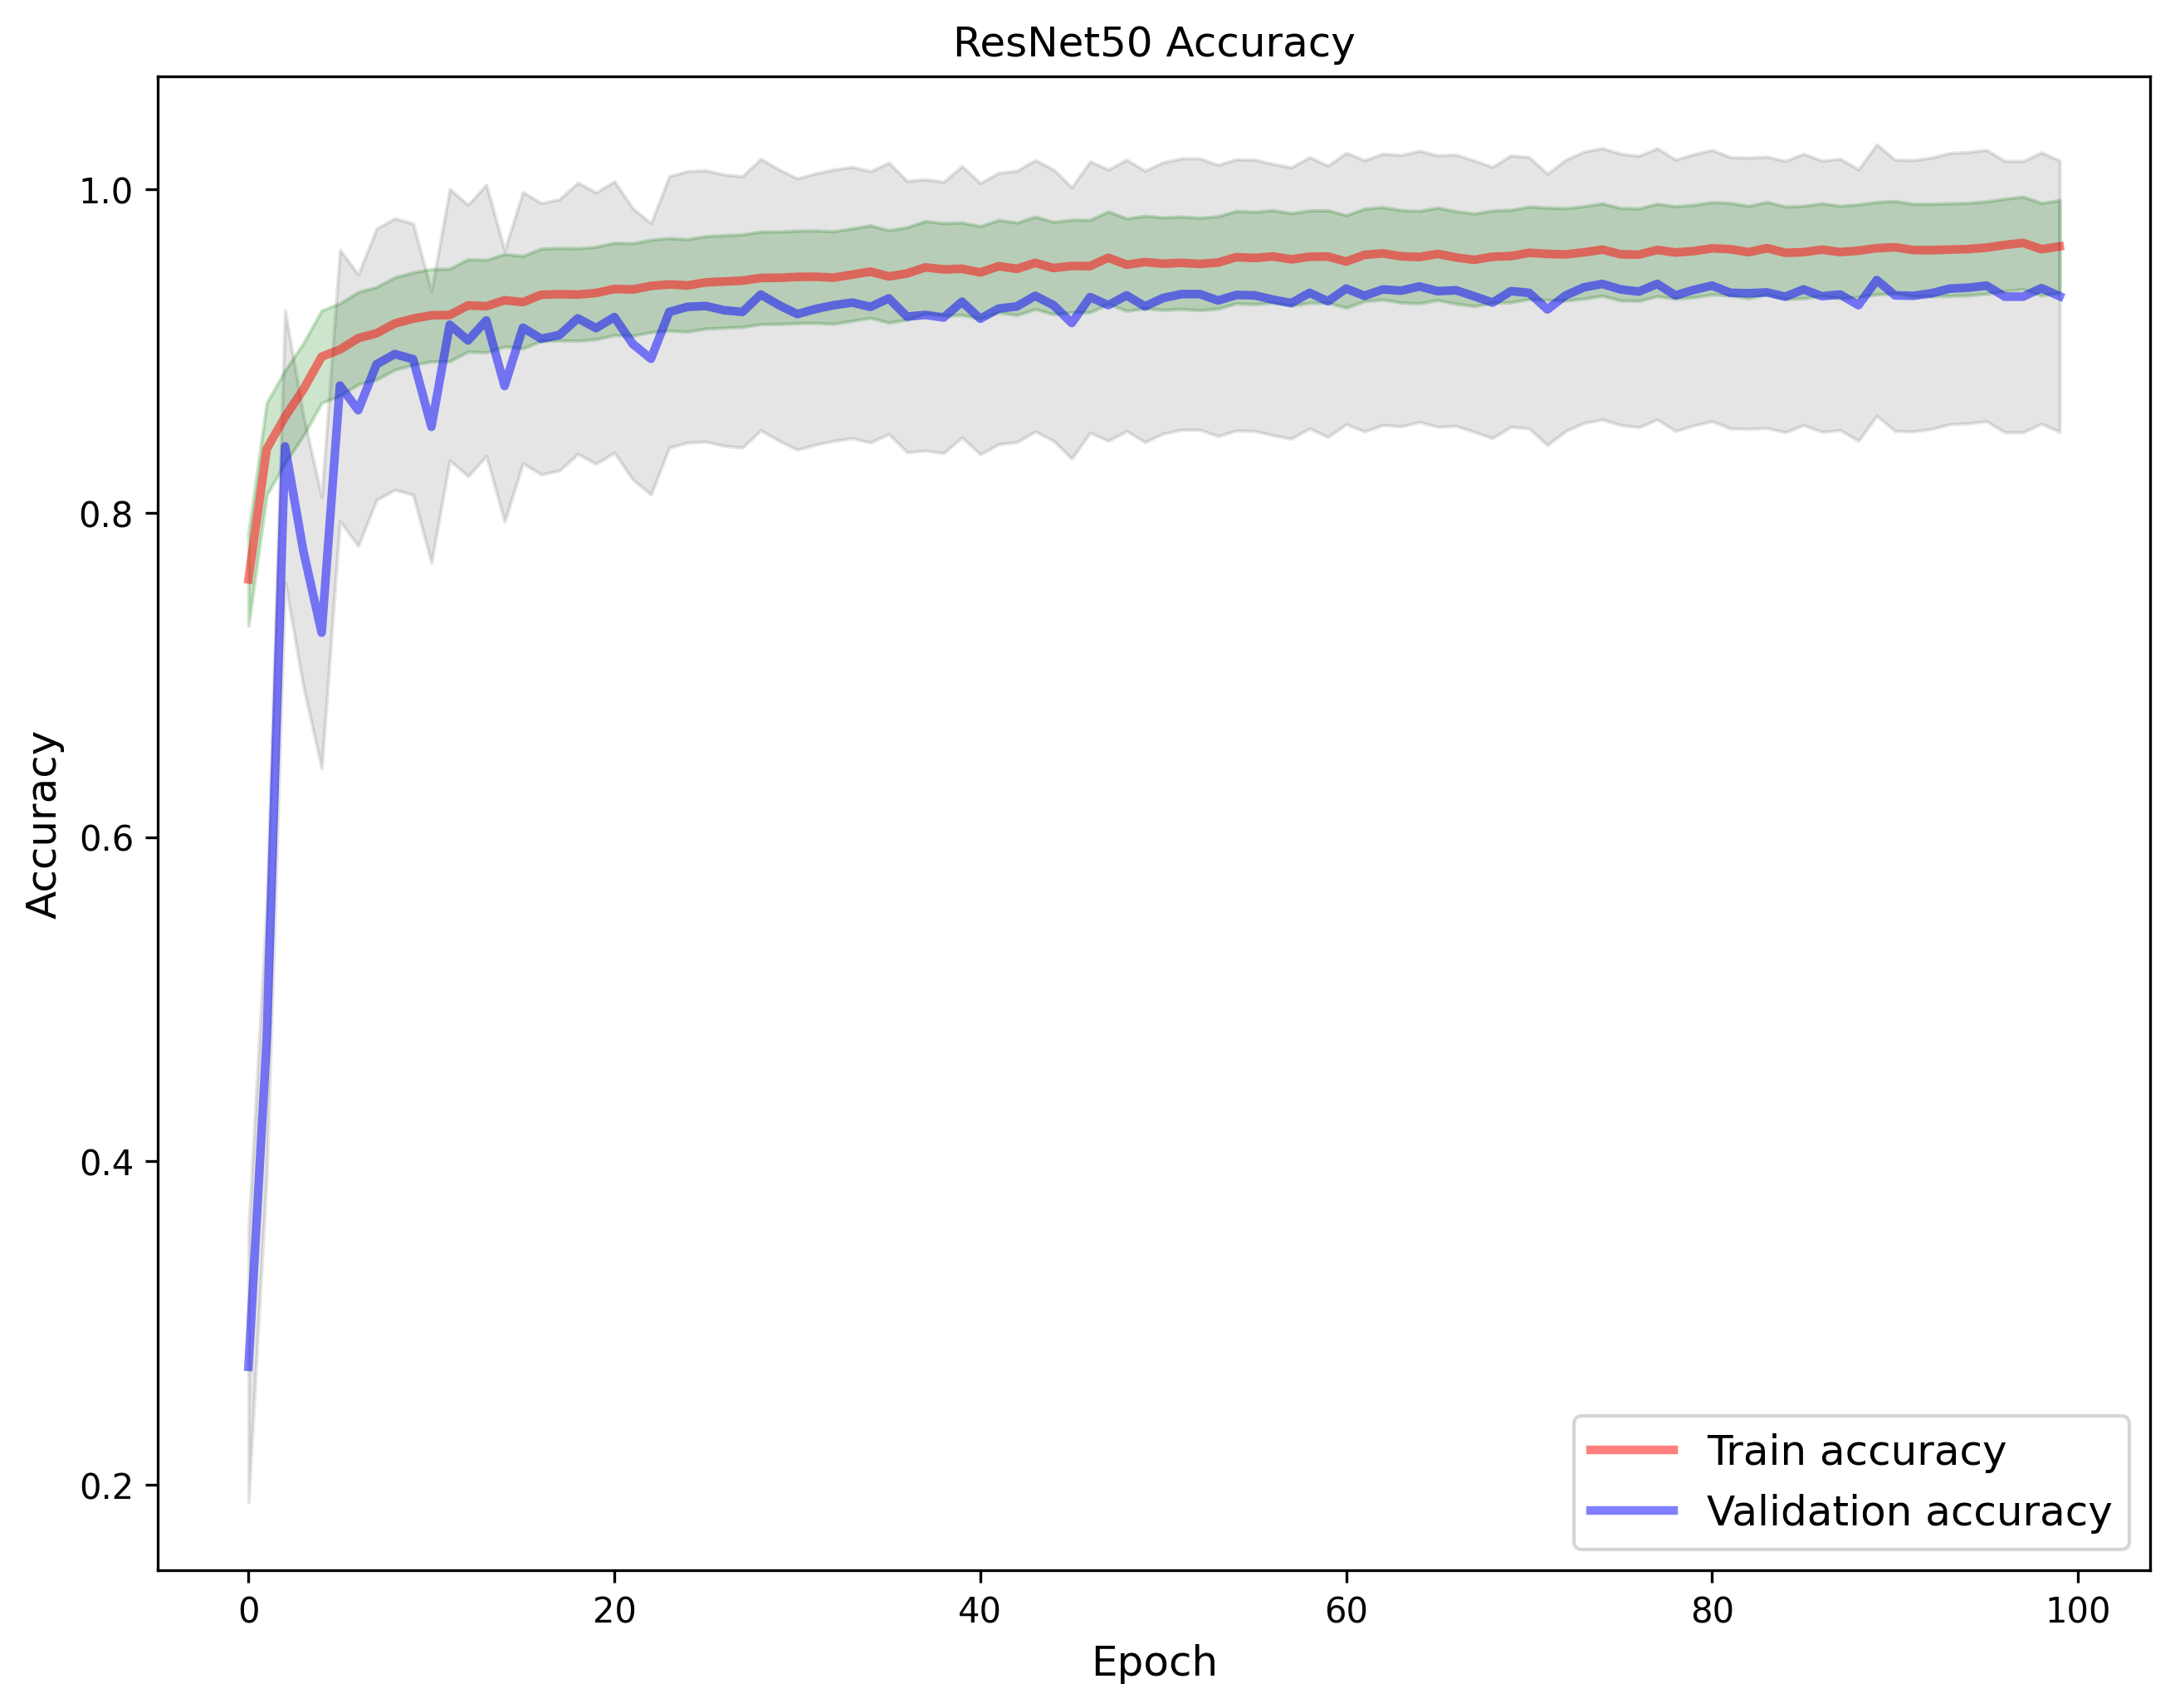

In [372]:
fig= plt.figure(figsize=(8,6),dpi=300)
axes= fig.add_axes([0,0,1,1])
a1 =  accuracy -  np.std(accuracy)
a2 =  accuracy + np.std(accuracy)
axes.plot(x,accuracy, color='red', alpha=0.5,linewidth=2.5)
axes.fill_between(x, a1, a2,color="green",alpha=0.2)
a1 =  val_accuracy -  np.std(val_accuracy)
a2 =  val_accuracy + np.std(val_accuracy)
axes.plot(x,val_accuracy, color='blue', alpha=0.5,linewidth=2.5)
axes.fill_between(x, a1, a2,color="black",alpha=0.1)
axes.set_xlabel("Epoch",fontsize=12)
axes.set_ylabel("Accuracy",fontsize=12)
# plt.legend(['Accuracy','Val_accuracy'], title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(['Train accuracy','Validation accuracy'],fontsize=12,loc='lower right')
plt.title("ResNet50 Accuracy",fontsize=12)
plt.savefig(f'{figure}/resnet50_train_val_accuracy.pdf',bbox_inches='tight', dpi=300)
plt.show()

# Model visualization for VGG19

In [348]:
!ls

0.png                           batch_history.csv
Baseline_model_V3.ipynb         cleaned_data.csv
Baseline_model_V5.ipynb         densenet121_train_history.csv
Feature Map Visualization.ipynb resnet50_train_history.csv
Model History.ipynb             src
PrettyPlotter.ipynb             toy model.ipynb
Result_Metrics.ipynb            vgg19_train_history.csv


In [373]:
df =  pd.read_csv(os.path.join(path,'vgg19_train_history.csv'))

In [374]:
loss =  df['loss']
val_loss  =  df['val_loss']
accuracy =  df['accuracy']
val_accuracy  =  df['val_accuracy']
x =  np.arange(0,100,1)

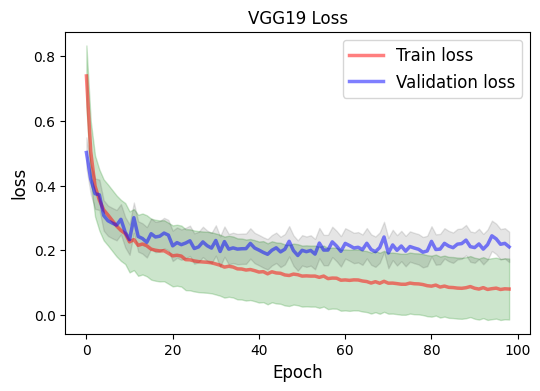

In [351]:
fig, ax = plt.subplots(dpi=100) # let's make it bigger
camera = Camera(fig)# the camera gets our figure
l1 =  loss -  np.std(loss)
l2 =  loss + np.std(loss)
lv1 =  val_loss -  np.std(val_loss)
lv2 =  val_loss + np.std(val_loss)
for i in range(len(x)):
    x_t = x[:i] # current dataset
    y_t = loss[:i] # current sine
    xv_t = x[:i] # current dataset
    yv_t = val_loss[:i] # current sine
    ax.plot(x_t, y_t, 'r',color='red', alpha=0.5,linewidth=2.5,)
    ax.fill_between(x[:i], l1[:i], l2[:i],color="green",alpha=0.2)
    
    ax.plot(x_t,yv_t, color='blue', alpha=0.5,linewidth=2.5,)
    ax.fill_between(x[:i], lv1[:i], lv2[:i],color="black",alpha=0.1)
    ax.set_xlabel("Epoch",fontsize=12)
    ax.set_ylabel("loss",fontsize=12)
    camera.snap()
plt.legend(['Train loss','Validation loss'],fontsize=12)
plt.title("VGG19 Loss",fontsize=12)
animation = camera.animate(blit=False, interval=120)
HTML(animation.to_html5_video())

In [16]:
animation.save(f'{figure}/vgg19_train_val_loss.mp4',
               dpi=300,
               savefig_kwargs={
                   'frameon': False,
                   'pad_inches': 'tight'
               }
              )

In [17]:
# !ffmpeg -i '/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/Essay/src/vgg19_train_val_loss.mp4' -filter:v fps=fps=30 '/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/Essay/src/vgg19_train_val_loss.gif'

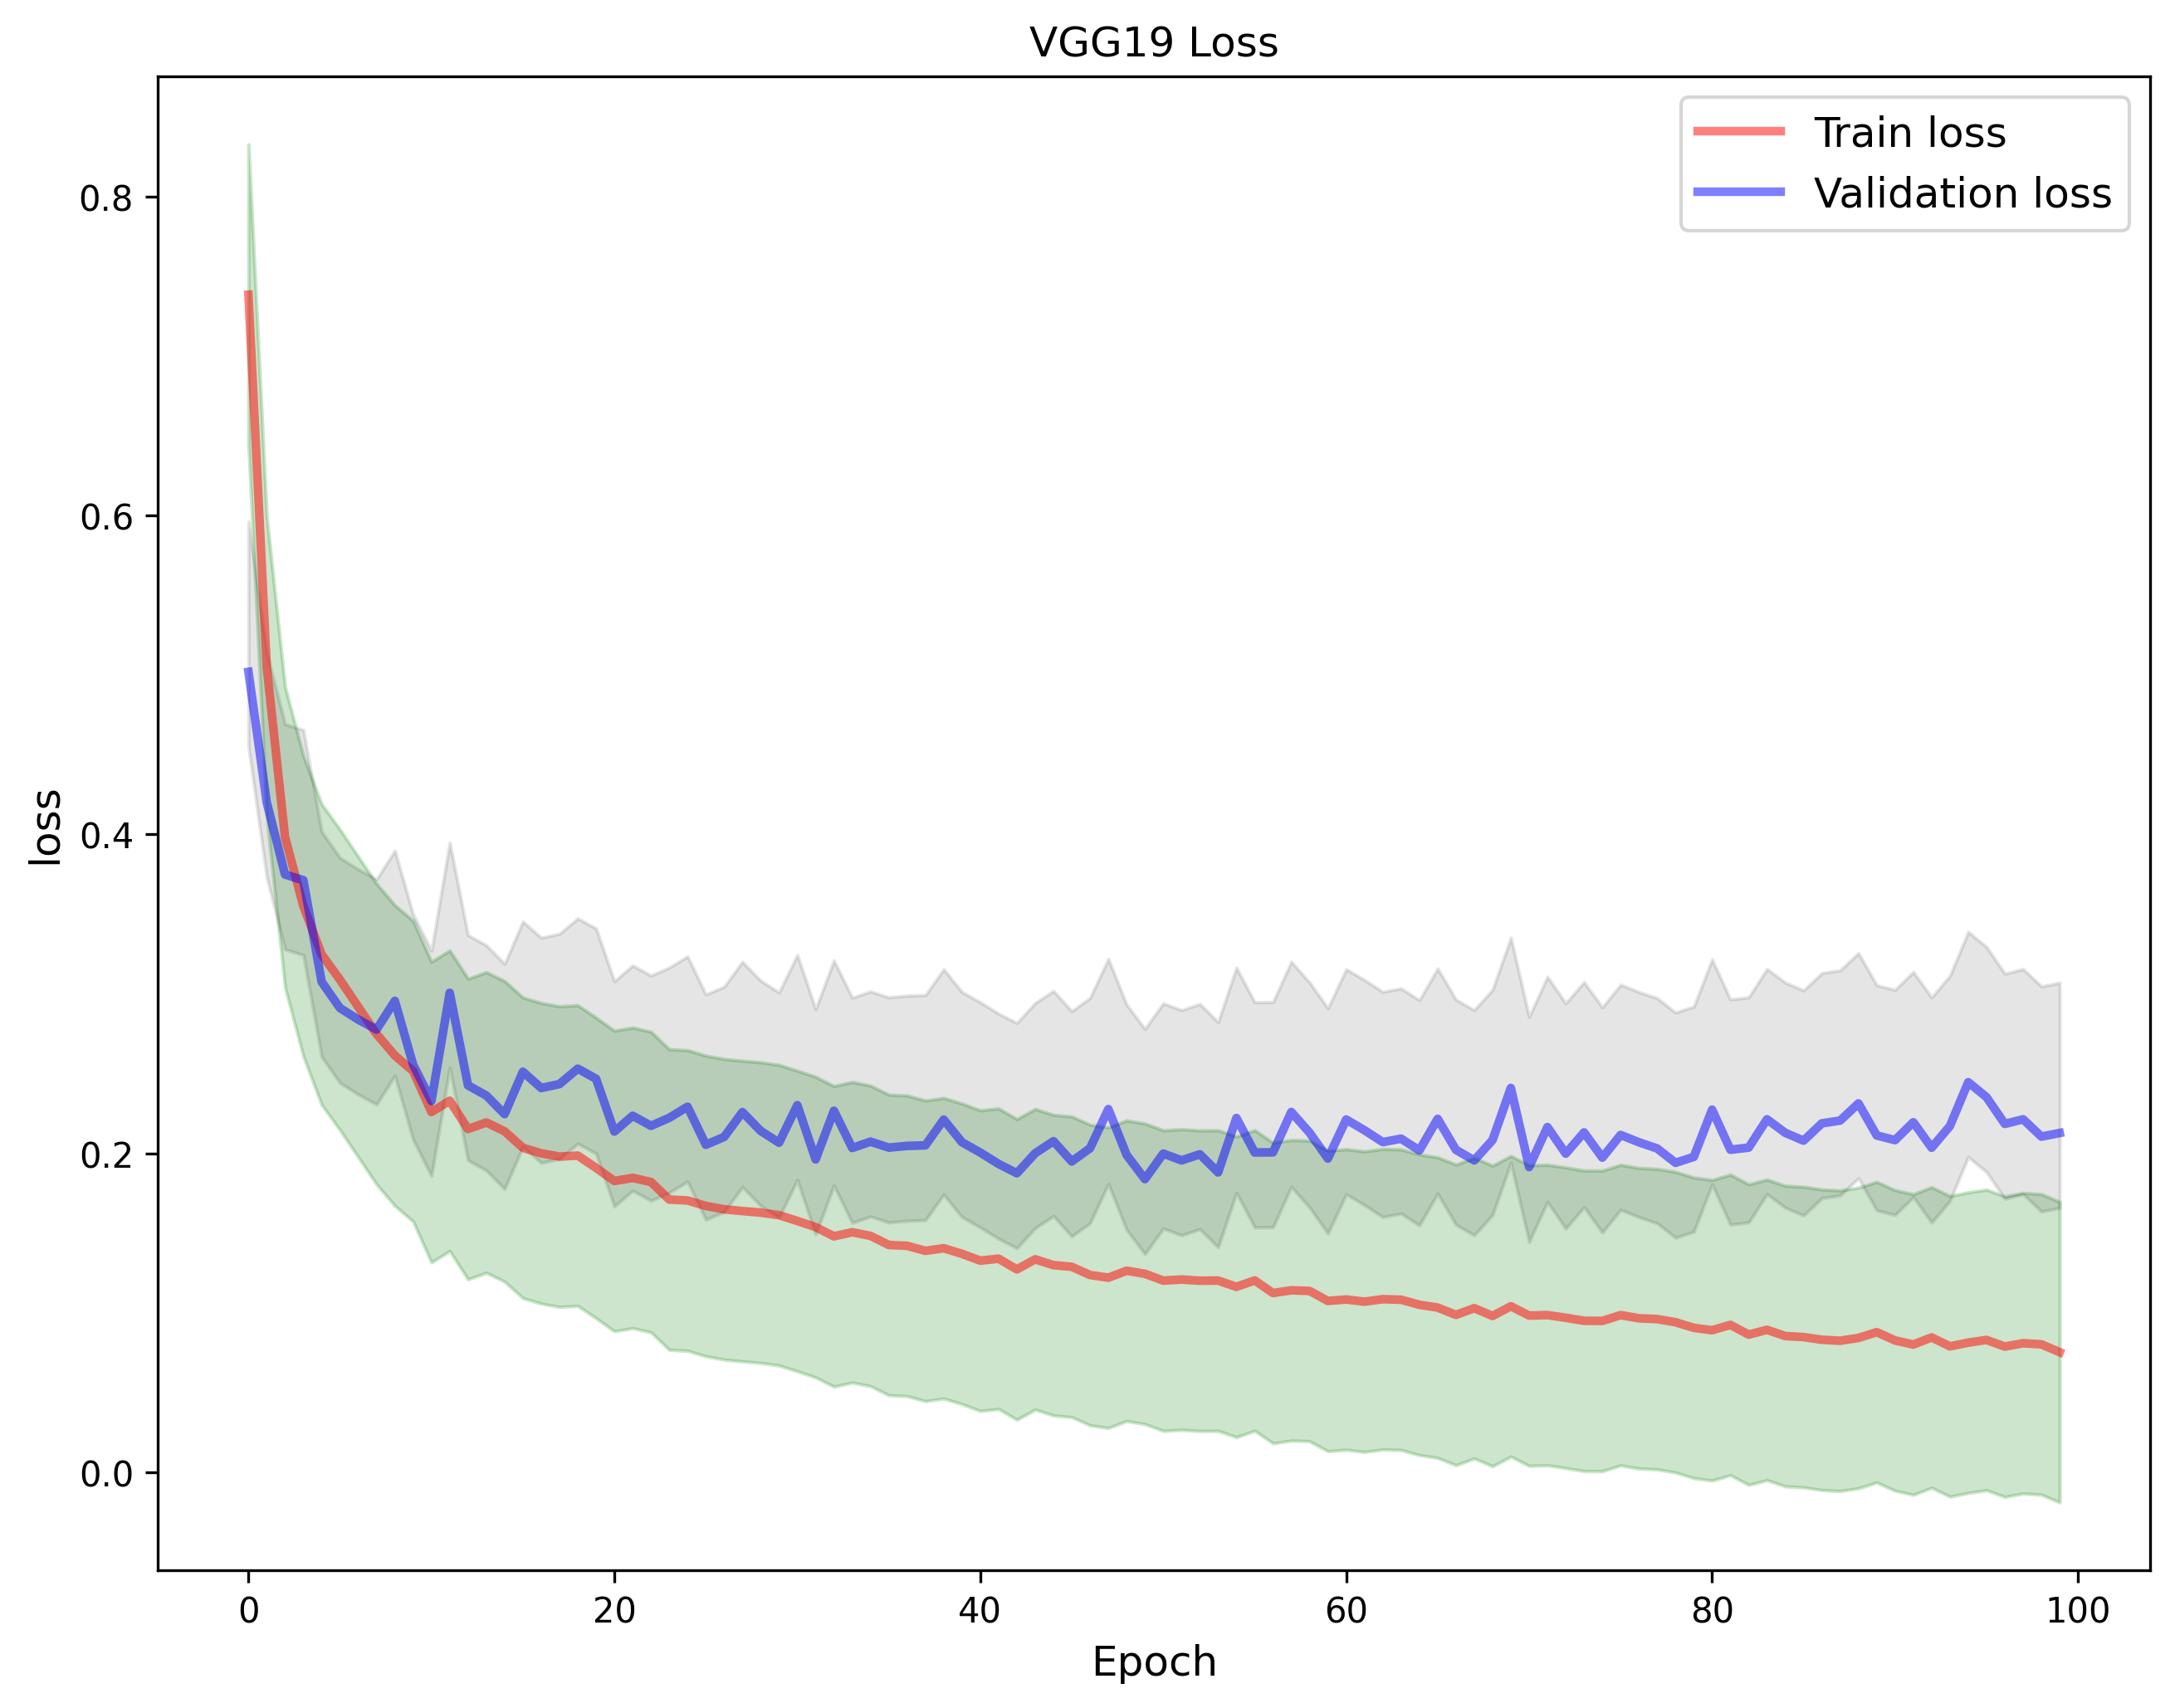

In [375]:
fig= plt.figure(figsize=(8,6),dpi=300)
axes= fig.add_axes([0,0,1,1])
l1 =  loss -  np.std(loss)
l2 =  loss + np.std(loss)
axes.plot(x,loss, color='red', alpha=0.5,linewidth=2.5,label="Sin(x)+Noise")
axes.fill_between(x, l1, l2,color="green",alpha=0.2)
l1 =  val_loss -  np.std(val_loss)
l2 =  val_loss + np.std(loss)
axes.plot(x,val_loss, color='blue', alpha=0.5,linewidth=2.5,label="Sin(x)+Noise")
axes.fill_between(x, l1, l2,color="black",alpha=0.1)
axes.set_xlabel("Epoch",fontsize=12)
axes.set_ylabel("loss",fontsize=12)
plt.legend(['Train loss','Validation loss'],fontsize=12)
plt.title("VGG19 Loss",fontsize=12)
plt.savefig(f'{figure}/vgg19_train_val_loss.pdf',bbox_inches='tight', dpi=300)
plt.show()

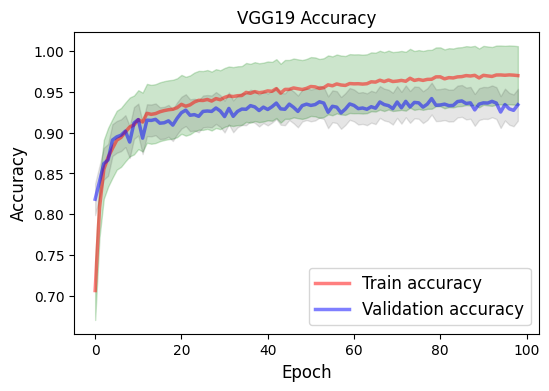

In [353]:
fig, ax = plt.subplots(dpi=100) # let's make it bigger
camera = Camera(fig)# the camera gets our figure
a1 =  accuracy -  np.std(accuracy)
a2 =  accuracy + np.std(accuracy)
av1 =  val_accuracy -  np.std(val_accuracy)
av2 =  val_accuracy + np.std(val_accuracy)
for i in range(len(x)):
    x_t = x[:i] # current dataset
    y_t = accuracy[:i] # current sine
    xv_t = x[:i] # current dataset
    yv_t = val_accuracy[:i] # current sine
    ax.plot(x_t, y_t, 'r',color='red', alpha=0.5,linewidth=2.5,)
    ax.fill_between(x[:i], a1[:i], a2[:i],color="green",alpha=0.2)
    
    ax.plot(x_t,yv_t, color='blue', alpha=0.5,linewidth=2.5,)
    ax.fill_between(x[:i], av1[:i], av2[:i],color="black",alpha=0.1)
    ax.set_xlabel("Epoch",fontsize=12)
    ax.set_ylabel("Accuracy",fontsize=12)
    camera.snap()
plt.legend(['Train accuracy','Validation accuracy'],fontsize=12,loc='lower right')
plt.title("VGG19 Accuracy",fontsize=12)
animation = camera.animate(blit=False, interval=120)
HTML(animation.to_html5_video())

In [20]:
animation.save(f'{figure}/vgg19_train_val_accuracy.mp4',
               dpi=300,
               savefig_kwargs={
                   'frameon': False,
                   'pad_inches': 'tight'
               }
              )

In [21]:
# !ffmpeg -i '/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/Essay/src/vgg19_train_val_accuracy.mp4' -filter:v fps=fps=30 '/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/Essay/src/vgg19_train_val_accuracy.gif'

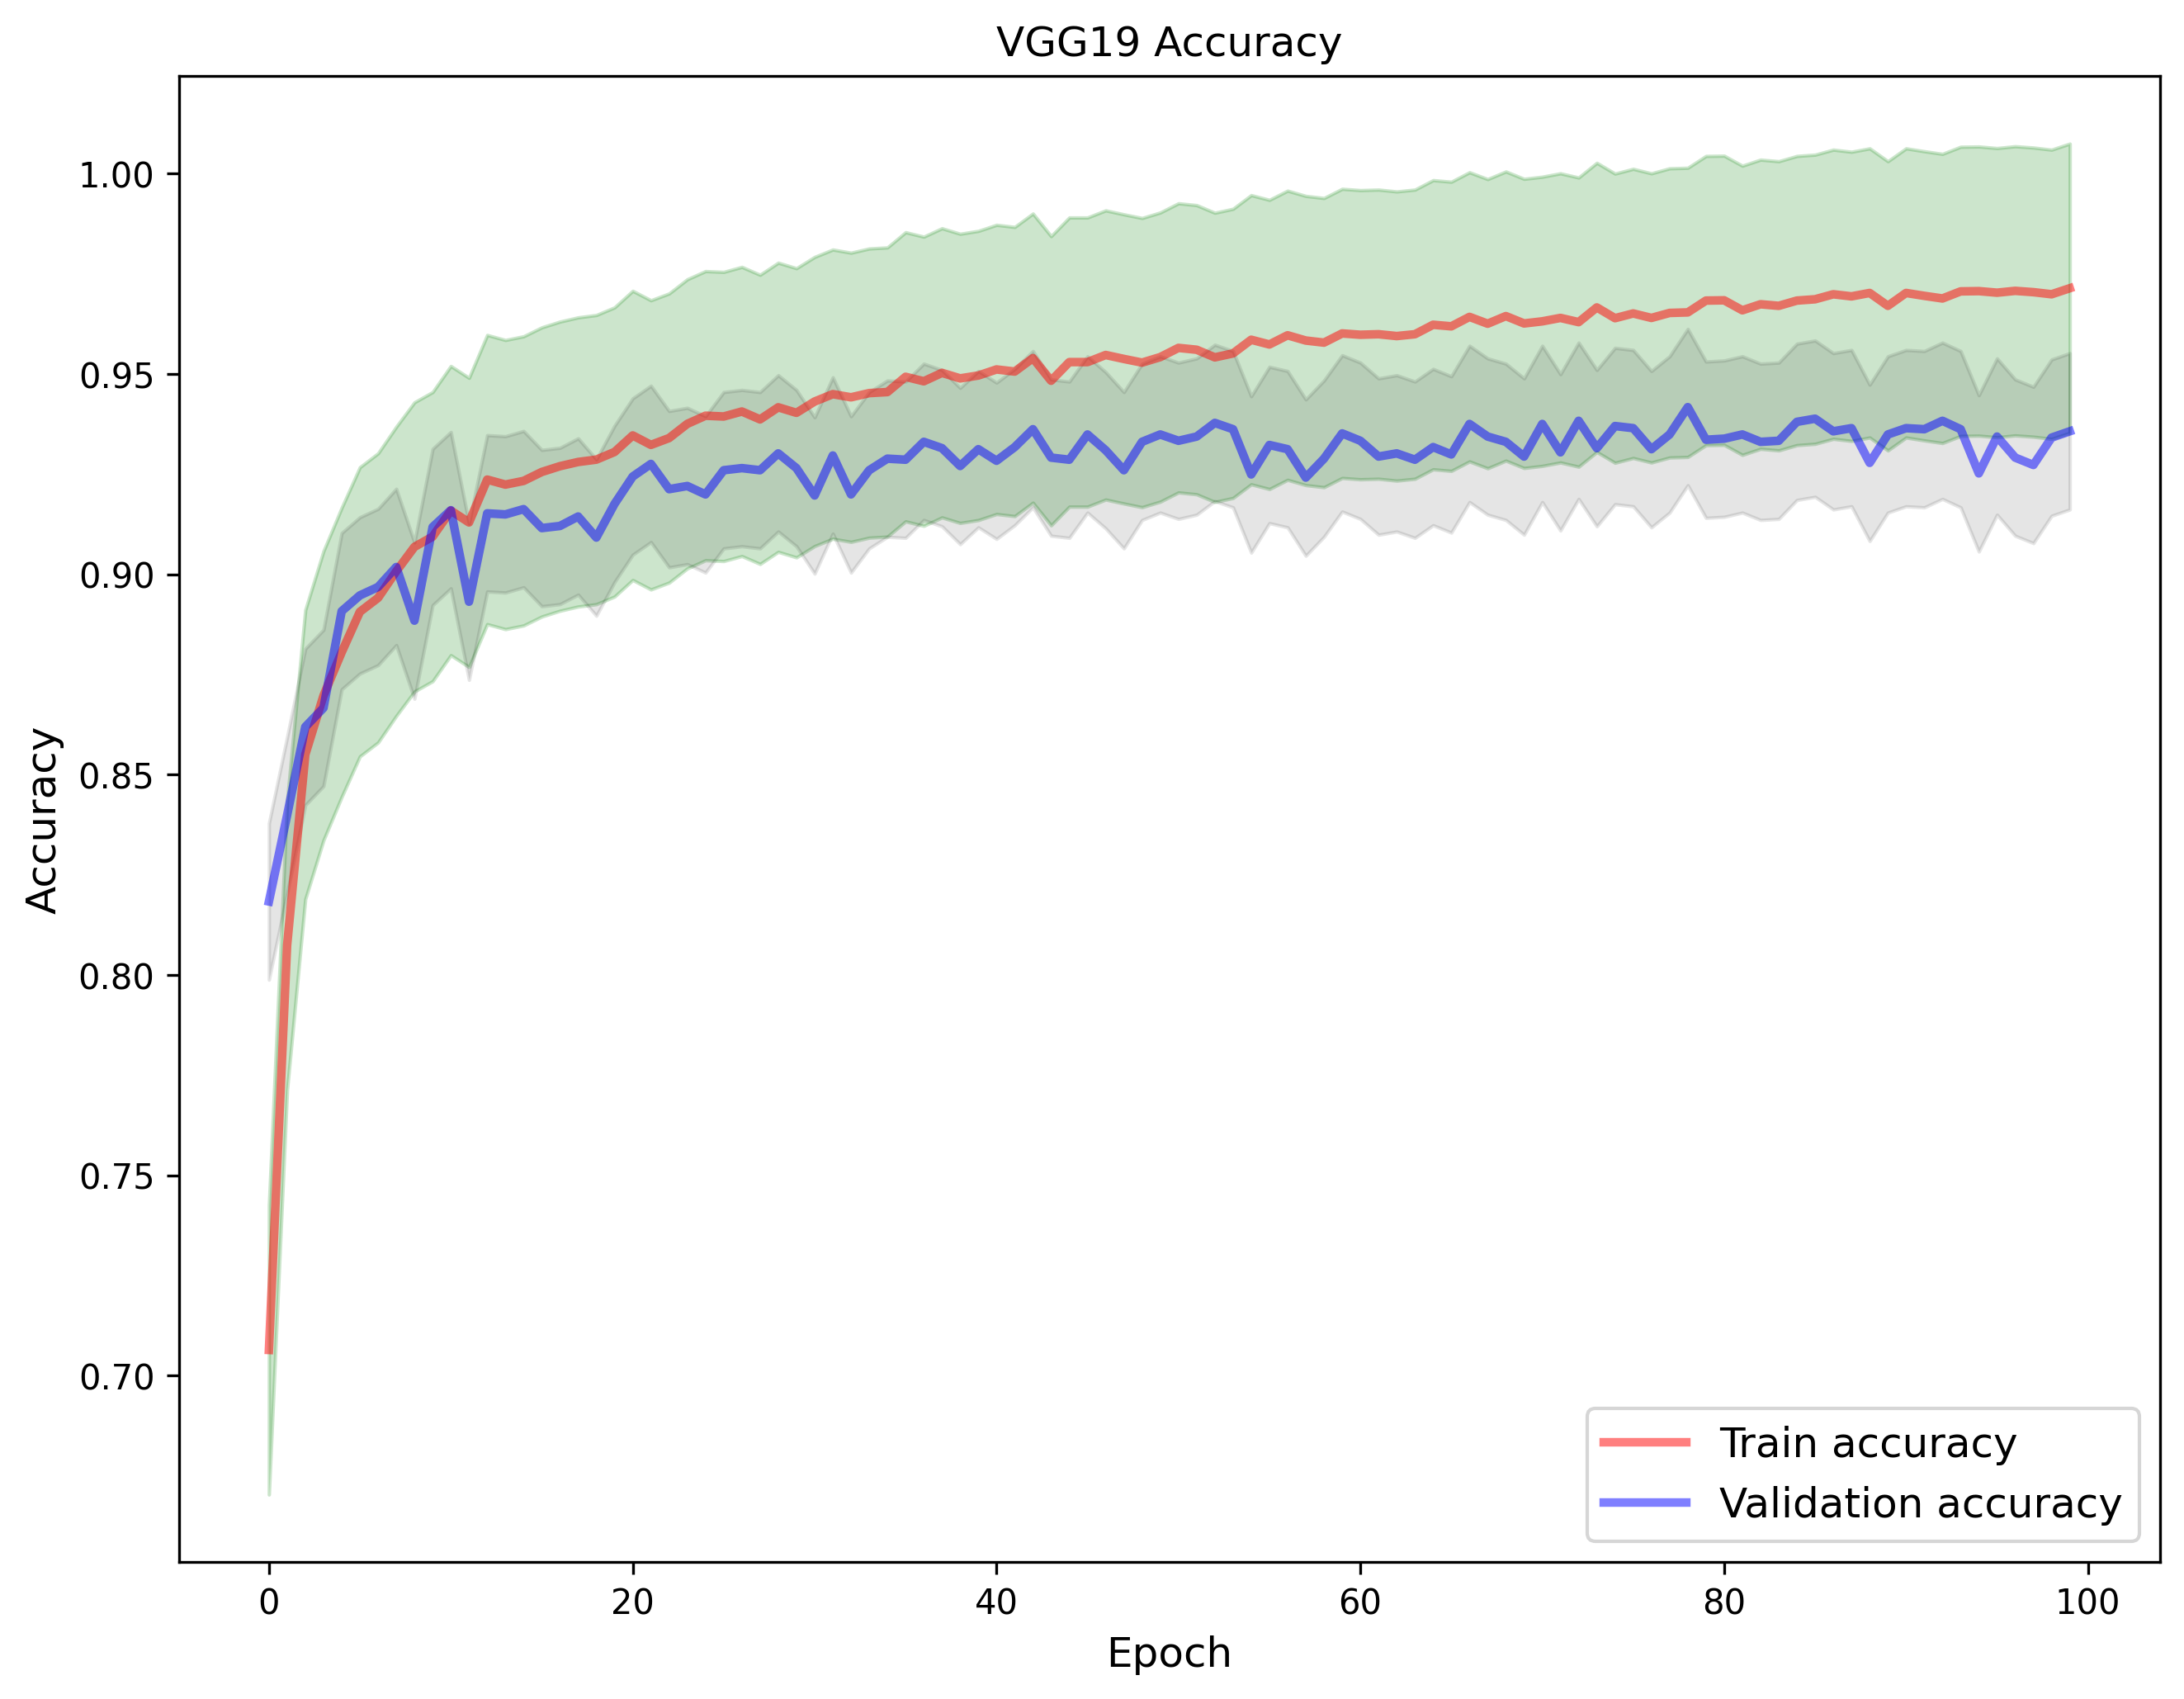

In [376]:
fig= plt.figure(figsize=(8,6),dpi=300)
axes= fig.add_axes([0,0,1,1])
a1 =  accuracy -  np.std(accuracy)
a2 =  accuracy + np.std(accuracy)
p1  = axes.plot(x,accuracy, color='red', alpha=0.5,linewidth=2.5)
axes.fill_between(x, a1, a2,color="green",alpha=0.2)
a1 =  val_accuracy -  np.std(val_accuracy)
a2 =  val_accuracy + np.std(val_accuracy)
p2  = axes.plot(x,val_accuracy, color='blue', alpha=0.5,linewidth=2.5)
axes.fill_between(x, a1, a2,color="black",alpha=0.1)
axes.set_xlabel("Epoch",fontsize=12)
axes.set_ylabel("Accuracy",fontsize=12)

# plt.legend(['Accuracy','Val_accuracy'], title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(['Train accuracy','Validation accuracy'],fontsize=12,loc='lower right')
axes.set_title("VGG19 Accuracy",fontsize=12)
plt.savefig(f'{figure}/vgg19_train_val_accuracy.pdf',bbox_inches='tight', dpi=300)
plt.show()

# Densenet Model Visualization

In [355]:
!ls

0.png                           batch_history.csv
Baseline_model_V3.ipynb         cleaned_data.csv
Baseline_model_V5.ipynb         densenet121_train_history.csv
Feature Map Visualization.ipynb resnet50_train_history.csv
Model History.ipynb             src
PrettyPlotter.ipynb             toy model.ipynb
Result_Metrics.ipynb            vgg19_train_history.csv


In [377]:
df =  pd.read_csv(os.path.join(path,'densenet121_train_history.csv'))

In [378]:
loss =  df['loss']
val_loss  =  df['val_loss']
accuracy =  df['accuracy']
val_accuracy  =  df['val_accuracy']
x =  np.arange(0,100,1)

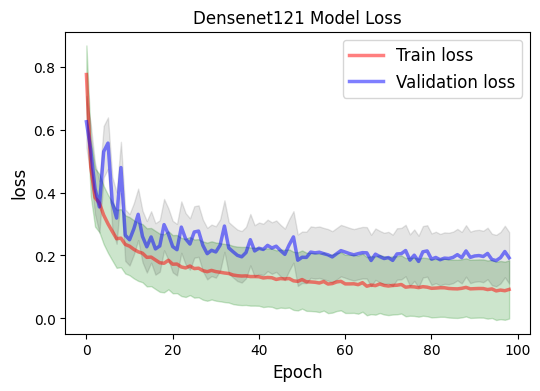

In [358]:
fig, ax = plt.subplots(dpi=100) # let's make it bigger
camera = Camera(fig)# the camera gets our figure
l1 =  loss -  np.std(loss)
l2 =  loss + np.std(loss)
lv1 =  val_loss -  np.std(val_loss)
lv2 =  val_loss + np.std(val_loss)
for i in range(len(x)):
    x_t = x[:i] # current dataset
    y_t = loss[:i] # current sine
    xv_t = x[:i] # current dataset
    yv_t = val_loss[:i] # current sine
    ax.plot(x_t, y_t, 'r',color='red', alpha=0.5,linewidth=2.5,)
    ax.fill_between(x[:i], l1[:i], l2[:i],color="green",alpha=0.2)
    
    ax.plot(x_t,yv_t, color='blue', alpha=0.5,linewidth=2.5,)
    ax.fill_between(x[:i], lv1[:i], lv2[:i],color="black",alpha=0.1)
    ax.set_xlabel("Epoch",fontsize=12)
    ax.set_ylabel("loss",fontsize=12)
    camera.snap()
plt.legend(['Train loss','Validation loss'],fontsize=12)
plt.title("Densenet121 Loss",fontsize=12)
animation = camera.animate(blit=False, interval=120)
HTML(animation.to_html5_video())

In [26]:
animation.save(f'{figure}/Densenet121_train_val_loss.mp4',
               dpi=300,
               savefig_kwargs={
                   'frameon': False,
                   'pad_inches': 'tight'
               }
              )

In [27]:
# !ffmpeg -i '/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/Essay/src/densenet121_train_val_loss.mp4' -filter:v fps=fps=30 '/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/Essay/src/densenet121_train_val_loss.gif'

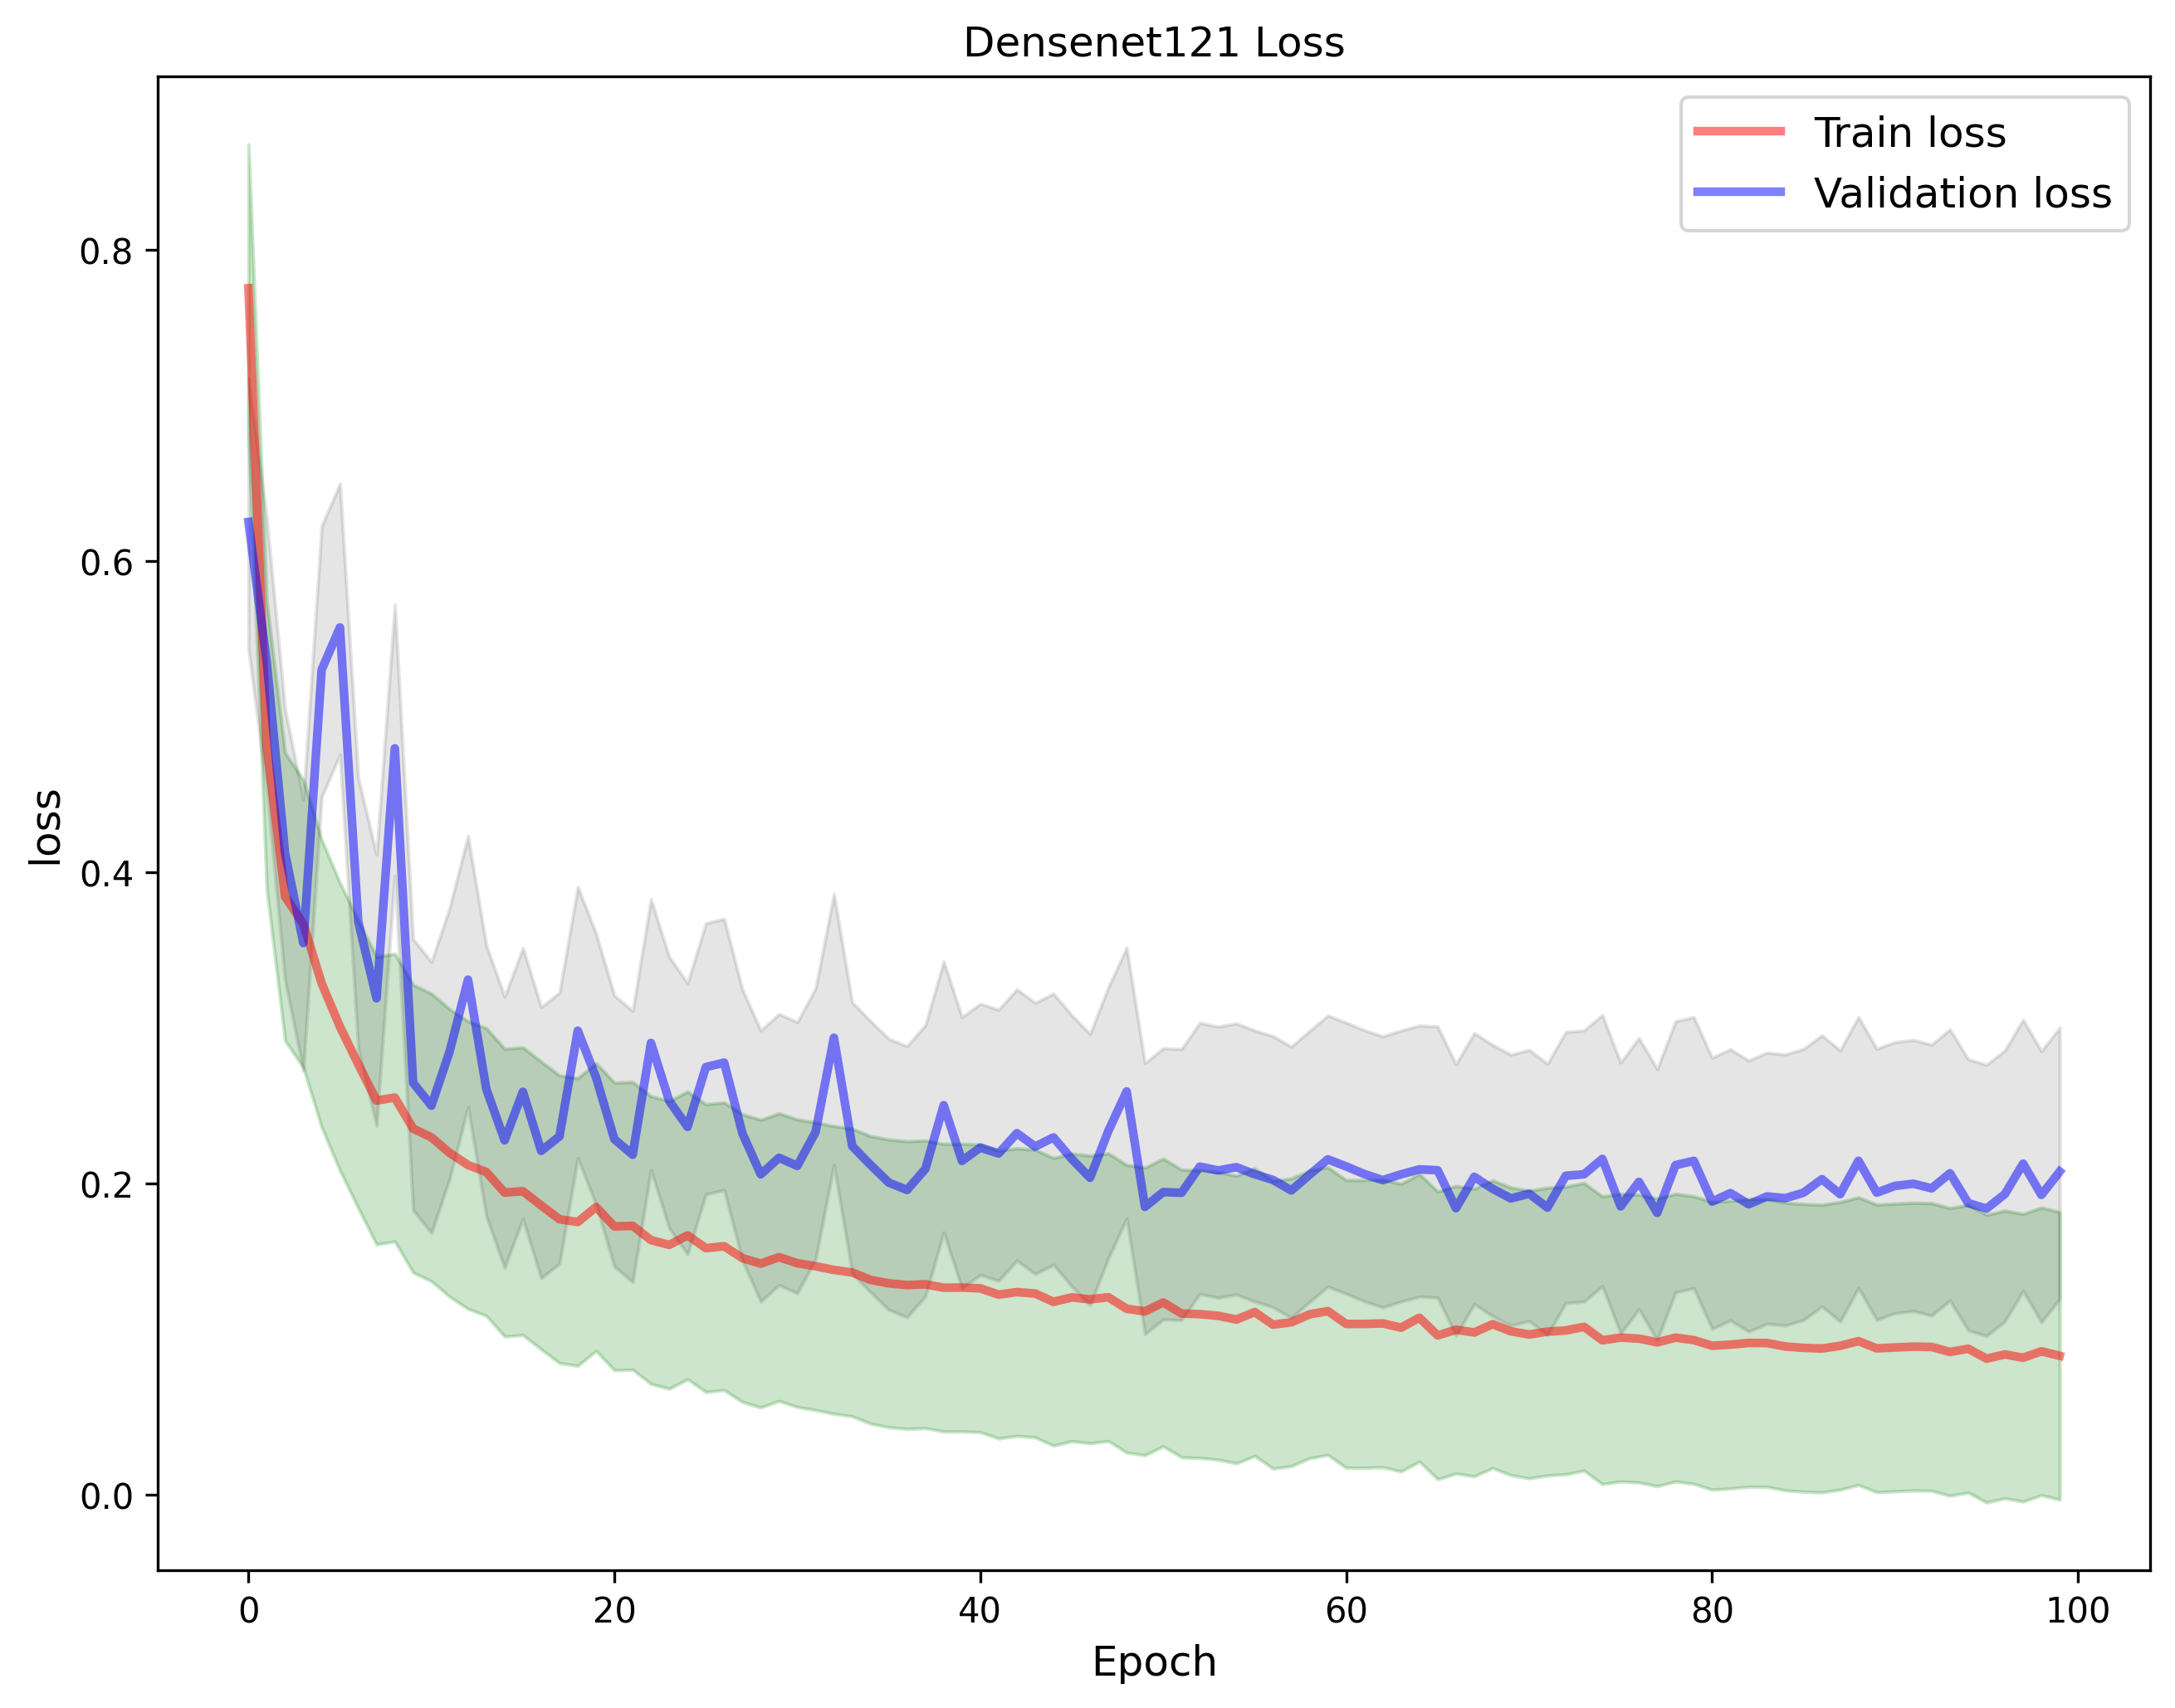

In [379]:
fig= plt.figure(figsize=(8,6),dpi=300)
axes= fig.add_axes([0,0,1,1])
l1 =  loss -  np.std(loss)
l2 =  loss + np.std(loss)
axes.plot(x,loss, color='red', alpha=0.5,linewidth=2.5,label="Sin(x)+Noise")
axes.fill_between(x, l1, l2,color="green",alpha=0.2)
l1 =  val_loss -  np.std(val_loss)
l2 =  val_loss + np.std(loss)
axes.plot(x,val_loss, color='blue', alpha=0.5,linewidth=2.5,label="Sin(x)+Noise")
axes.fill_between(x, l1, l2,color="black",alpha=0.1)
axes.set_xlabel("Epoch",fontsize=12)
axes.set_ylabel("loss",fontsize=12)
plt.legend(['Train loss','Validation loss'],fontsize=12)
plt.title("Densenet121 Loss",fontsize=12)
plt.savefig(f'{figure}/densenet121_train_val_loss.pdf',bbox_inches='tight', dpi=300)
plt.show()

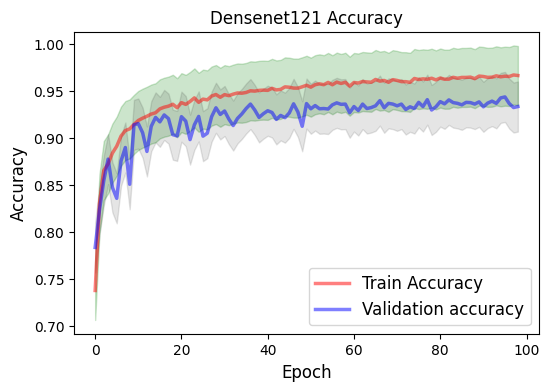

In [360]:
fig, ax = plt.subplots(dpi=100) # let's make it bigger
camera = Camera(fig)# the camera gets our figure
a1 =  accuracy -  np.std(accuracy)
a2 =  accuracy + np.std(accuracy)
av1 =  val_accuracy -  np.std(val_accuracy)
av2 =  val_accuracy + np.std(val_accuracy)
for i in range(len(x)):
    x_t = x[:i] # current dataset
    y_t = accuracy[:i] # current sine
    xv_t = x[:i] # current dataset
    yv_t = val_accuracy[:i] # current sine
    ax.plot(x_t, y_t, 'r',color='red', alpha=0.5,linewidth=2.5,)
    ax.fill_between(x[:i], a1[:i], a2[:i],color="green",alpha=0.2)
    
    ax.plot(x_t,yv_t, color='blue', alpha=0.5,linewidth=2.5,)
    ax.fill_between(x[:i], av1[:i], av2[:i],color="black",alpha=0.1)
    ax.set_xlabel("Epoch",fontsize=12)
    ax.set_ylabel("Accuracy",fontsize=12)
    camera.snap()
plt.legend(['Train Accuracy','Validation accuracy'],fontsize=12,loc='lower right')
plt.title("Densenet121 Accuracy",fontsize=12)
animation = camera.animate(blit=False, interval=120)
HTML(animation.to_html5_video())

In [30]:
animation.save(f'{figure}/densenet121_train_val_accuracy.mp4',
               dpi=300,
               savefig_kwargs={
                   'frameon': False,
                   'pad_inches': 'tight'
               }
              )

In [31]:
# !ffmpeg -i '/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/Essay/src/vgg19_train_val_accuracy.mp4' -filter:v fps=fps=30 '/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/Essay/src/vgg19_train_val_accuracy.gif'

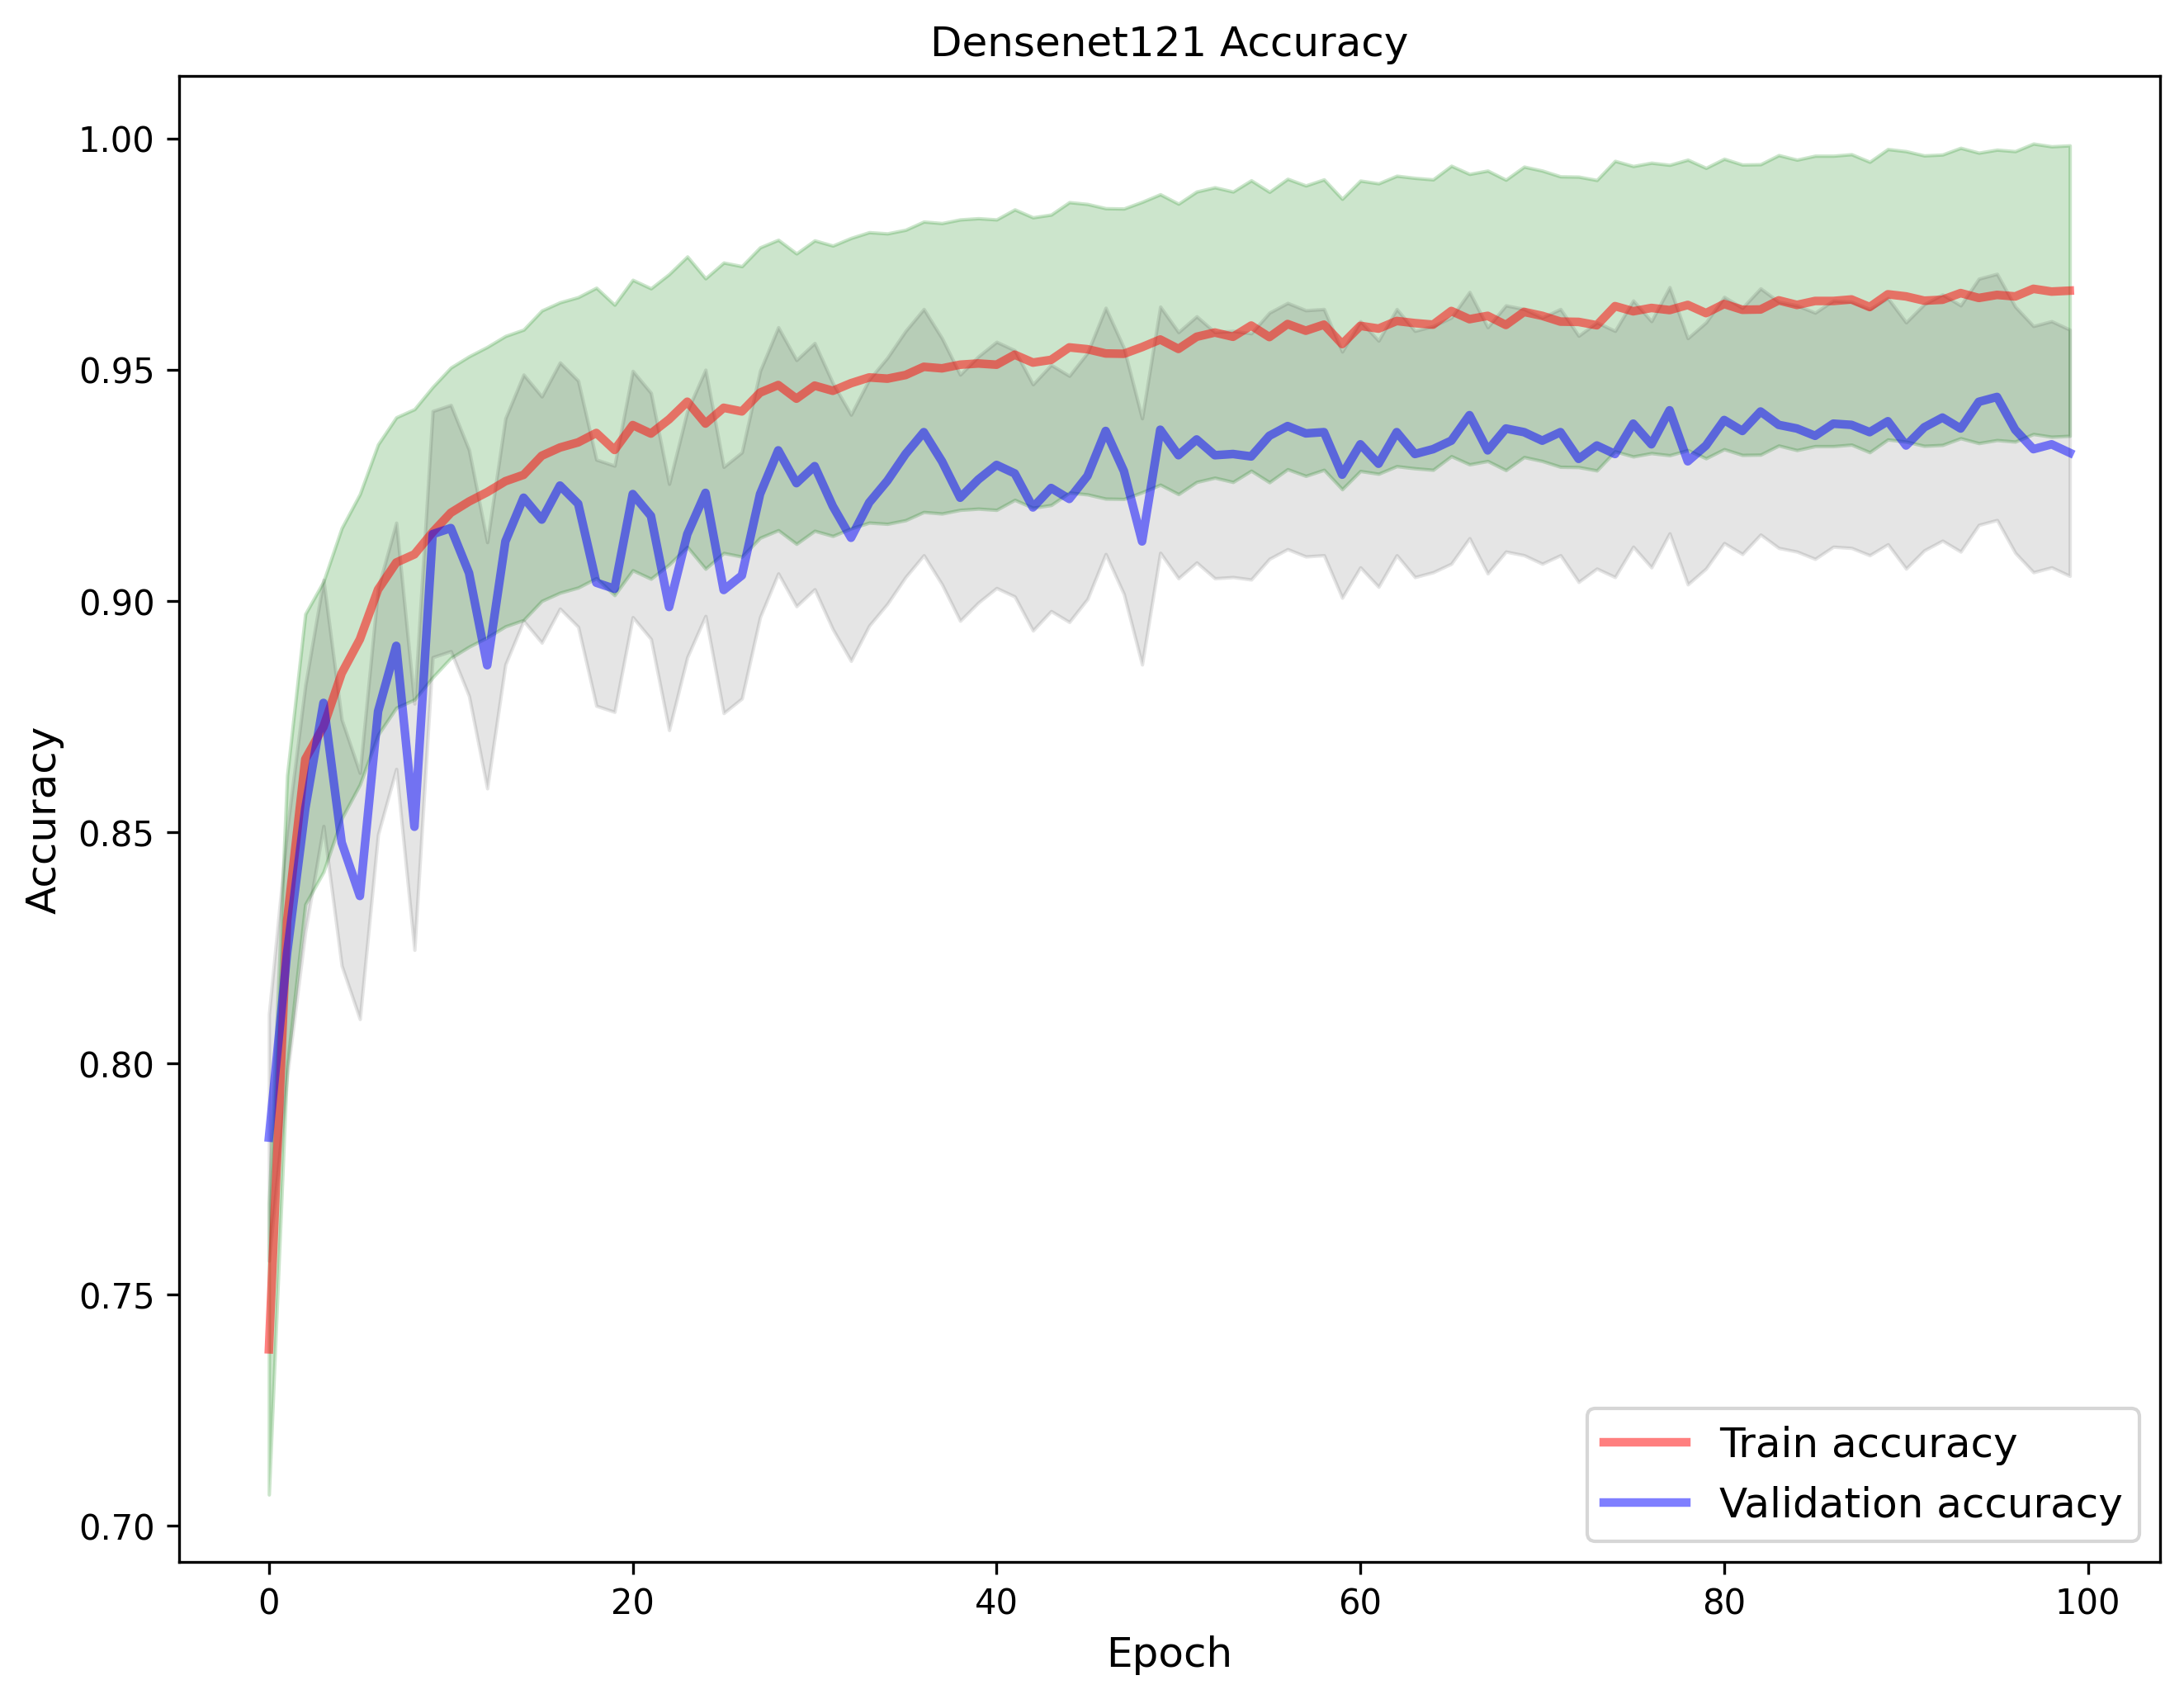

In [380]:
fig= plt.figure(figsize=(8,6),dpi=300)
axes= fig.add_axes([0,0,1,1])
a1 =  accuracy -  np.std(accuracy)
a2 =  accuracy + np.std(accuracy)
p1  = axes.plot(x,accuracy, color='red', alpha=0.5,linewidth=2.5)
axes.fill_between(x, a1, a2,color="green",alpha=0.2)
a1 =  val_accuracy -  np.std(val_accuracy)
a2 =  val_accuracy + np.std(val_accuracy)
p2  = axes.plot(x,val_accuracy, color='blue', alpha=0.5,linewidth=2.5)
axes.fill_between(x, a1, a2,color="black",alpha=0.1)
axes.set_xlabel("Epoch",fontsize=12)
axes.set_ylabel("Accuracy",fontsize=12)

# plt.legend(['Accuracy','Val_accuracy'], title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(['Train accuracy','Validation accuracy'],fontsize=12,loc='lower right')
axes.set_title("Densenet121 Accuracy",fontsize=12)
plt.savefig(f'{figure}/densenet121_train_val_accuracy.pdf',bbox_inches='tight', dpi=300)
plt.show()

In [363]:
lh = {'model':['ResNet-50','VGG-19','DenseNet-121'],'loss':[0.20872825384140015,0.2190869301557541,0.21872971951961517
                                                           ],'accuracy':[0.9385342597961426,0.9399527311325073,0.9323877096176147]}


df =  pd.DataFrame(lh)
df

,model,loss,accuracy
0,ResNet-50,0.208728,0.938534
1,VGG-19,0.219087,0.939953
2,DenseNet-121,0.218730,0.932388


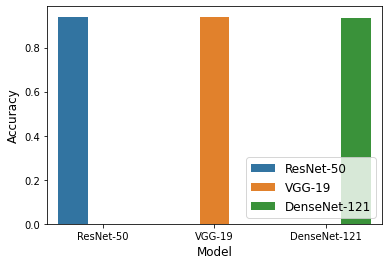

In [366]:
ax = sns.barplot(x="model", y="accuracy", hue="model", data=df,capsize=.5)
ax.set_xlabel("Model",fontsize=12)
ax.set_ylabel("Accuracy",fontsize=12)
plt.legend(loc='lower right',fontsize=12)
plt.show()

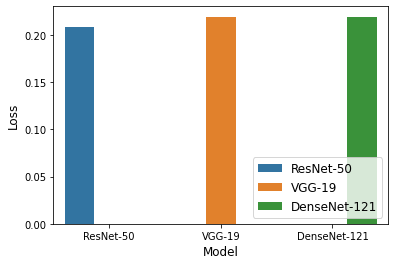

In [367]:
ax = sns.barplot(x="model", y="loss", hue="model", data=df,capsize=.5)
ax.set_xlabel("Model",fontsize=12)
ax.set_ylabel("Loss",fontsize=12)
plt.legend(loc='lower right',fontsize=12)
plt.show()

In [383]:
kernel =  np.array([[1,0,1],[0,1,1],[0,0,1]])
image =  np.random.randn(32,32)
kernel

array([[1, 0, 1],
       [0, 1, 1],
       [0, 0, 1]])